# ABOUT THIS DATASET
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
# Important Libraries
import numpy as np
import pandas as pd

In [2]:
# Load the heart failure clinical dataset
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Analysis

In [3]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
df.sample()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
174,65.0,0,198,1,35,1,281000.0,0.9,137,1,1,146,0


# Information of Dataframe
This code provides a summary of a Pandas DataFrame named 'df'.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.shape

(299, 13)

In [7]:
df.size

3887

# Checking for NaN values

This code checks for any NaN (missing values) values in the DataFrame 'df' and sums up the count of NaN values in each column. Here's what it means:

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Count Unique Value
This code snippet counts the occurences of each unique value in the 'DEATH_EVENT' column of the DataFrame 'df'.

In [9]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

# Visualizes the correlation

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
corr=df.corr()

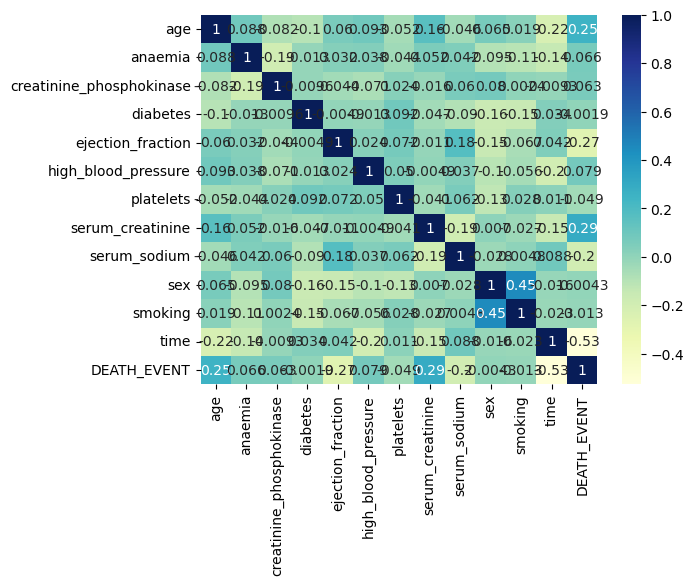

In [12]:
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()

# Data Splitting

In [13]:
X=df.drop(columns='DEATH_EVENT',axis=1)
Y=df['DEATH_EVENT']

In [14]:
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [17]:
print(X.shape,X_train.shape,X_test.shape)

(299, 12) (239, 12) (60, 12)


In [18]:
Y_train

53     1
172    0
23     0
98     0
244    0
      ..
75     1
22     1
72     1
15     1
168    0
Name: DEATH_EVENT, Length: 239, dtype: int64

# Model Selection

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier()

In [21]:
# training the Random Forest Classifier Model with training data
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)

In [22]:
# accuracy on test data
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,f1_score
X_test_prediction=rf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy on Test data:",test_data_accuracy)

Accuracy on Test data: 0.95


# Result

In [23]:
# Print Classification report
print(f"Classification Report for {rf}:")
print(classification_report(Y_test,y_pred))

Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.82      0.90        17

    accuracy                           0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60



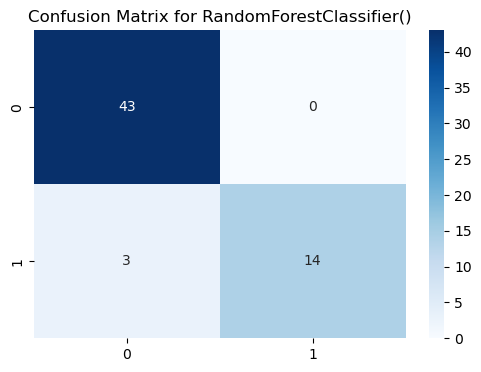

In [24]:
# Plot confusion matrics for all models
cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm,annot=True,cmap = 'Blues')
plt.title(f'Confusion Matrix for {rf}')
plt.show()